In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

### 0. Data load

In [2]:
df=pd.read_csv('D:/Work/002.code/jupyterNotebook/data/HEAT_TARGET/T_PATIENTS_DAILY_WHOLE_0730.csv')
df.head(2)

,sido,createDate,sidoCd,weekendYN,stn,lat,lng,gridX,gridY,satX,...,fourMeanta1,fourMinta2,fourMaxta2,fourMeanta2,fourMinta3,fourMaxta3,fourMeanta3,patientsCnt,instDate,updtDate
0,경기도,2014-05-01,31,0,NaN,NaN,NaN,60,120,452,...,15,21,24,22,14,21,17,0,2024-07-30,2024-07-30
1,충청북도,2014-05-01,33,0,NaN,NaN,NaN,69,107,452,...,15,21,23,22,15,22,18,0,2024-07-30,2024-07-30


In [3]:
df['patientsCD'] = df['patientsCnt'].apply(lambda x: 0 if x == 0 else 1)

In [5]:
df.head(2)

,sido,createDate,sidoCd,weekendYN,stn,lat,lng,gridX,gridY,satX,...,fourMinta2,fourMaxta2,fourMeanta2,fourMinta3,fourMaxta3,fourMeanta3,patientsCnt,instDate,updtDate,patientsCD
0,경기도,2014-05-01,31,0,NaN,NaN,NaN,60,120,452,...,21,24,22,14,21,17,0,2024-07-30,2024-07-30,0
1,충청북도,2014-05-01,33,0,NaN,NaN,NaN,69,107,452,...,21,23,22,15,22,18,0,2024-07-30,2024-07-30,0


In [6]:
print(df.columns)

lst=['sido', 'createDate', 'sidoCd', 'weekendYN', 'minTa', 'maxTa', 'meanTa', 'gapTa', 'minTatm', 'maxTatm', 'meanTatm', 'gapTatm', 'minHm', 'maxHm', 'meanHm', 'gapHm', 'minWbtemp', 'maxWbtemp', 'meanWbtemp', 'gapWbtemp', 'minWs',
    'maxWs', 'meanWs', 'trop3days', 'heatWavetemp', 'heatAlerttemp', 'min3days', 'max3days', 'minmaxGap', 'popularMan', 'popularWoman', 'agricultureMan', 'agricultureWoman', 'sixMinta0', 'sixMaxta0', 'sixMeanta0', 'sixMinta1',
    'sixMaxta1', 'sixMeanta1', 'fourMinta0', 'fourMaxta0', 'fourMeanta0', 'fourMinta1', 'fourMaxta1', 'fourMeanta1', 'fourMinta2', 'fourMaxta2','fourMeanta2', 'fourMinta3', 'fourMaxta3', 'fourMeanta3', 'patientsCnt', 'patientsCD']

data=df[lst]

Index(['sido', 'createDate', 'sidoCd', 'weekendYN', 'stn', 'lat', 'lng',
       'gridX', 'gridY', 'satX', 'satY', 'minTa', 'maxTa', 'meanTa', 'gapTa',
       'minTatm', 'maxTatm', 'meanTatm', 'gapTatm', 'minHm', 'maxHm', 'meanHm',
       'gapHm', 'minWbtemp', 'maxWbtemp', 'meanWbtemp', 'gapWbtemp', 'minWs',
       'maxWs', 'meanWs', 'trop3days', 'heatWavetemp', 'heatWavetempwht',
       'heatAlerttemp', 'heatAlerttempwht', 'min3days', 'max3days',
       'minmaxGap', 'popularMan', 'popularWoman', 'agricultureMan',
       'agricultureWoman', 'sixMinta0', 'sixMaxta0', 'sixMeanta0', 'sixMinta1',
       'sixMaxta1', 'sixMeanta1', 'fourMinta0', 'fourMaxta0', 'fourMeanta0',
       'fourMinta1', 'fourMaxta1', 'fourMeanta1', 'fourMinta2', 'fourMaxta2',
       'fourMeanta2', 'fourMinta3', 'fourMaxta3', 'fourMeanta3', 'patientsCnt',
       'instDate', 'updtDate', 'patientsCD'],
      dtype='object')


<Axes: xlabel='patientsCD', ylabel='Count'>

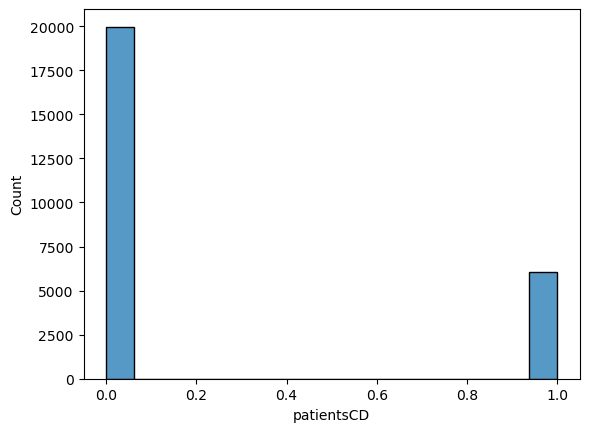

In [8]:
sns.histplot(x=data['patientsCD'])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

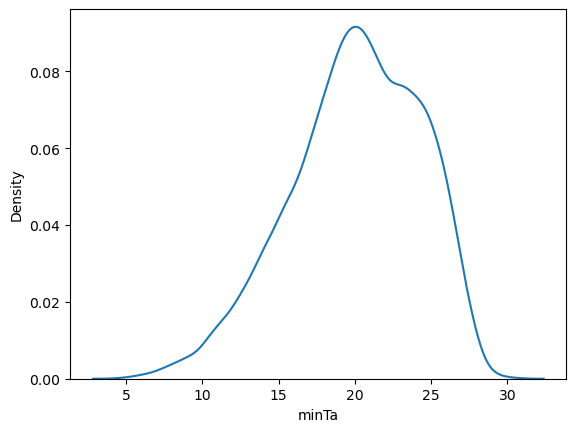

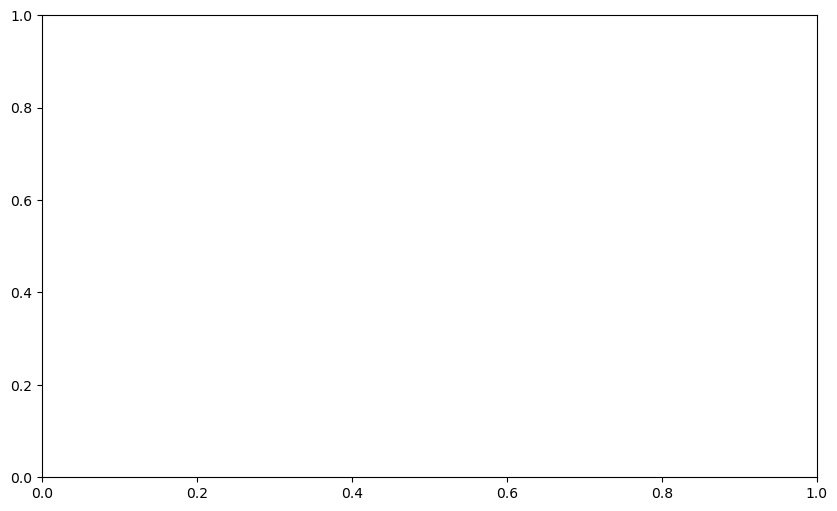

In [11]:
sns.kdeplot(x=data['minTa'])

# KDE 플롯 생성
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='minTa', hue='patientsCD', fill=True)

# 레이블 및 제목 설정
plt.xlabel('minTa')
plt.ylabel('Density')
plt.title('Density Plot of minTa by patientsCD')
plt.legend(title='patientsCD', loc='upper right')
plt.show()

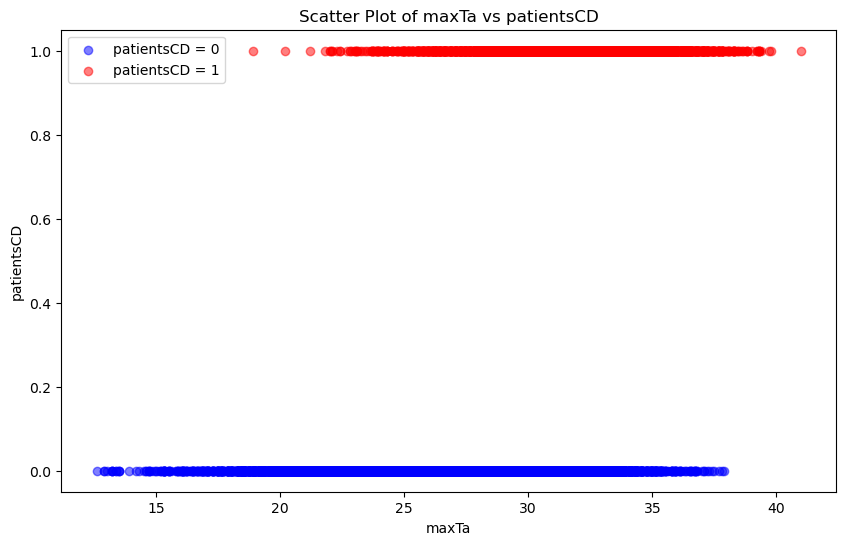

In [14]:
# 산점도
plt.figure(figsize=(10, 6))

# patientsCnt가 0인 경우
plt.scatter(df[df['patientsCD'] == 0]['maxTa'], df[df['patientsCD'] == 0]['patientsCD'], 
            color='blue', alpha=0.5, label='patientsCD = 0')

# patientsCnt가 1인 경우
plt.scatter(df[df['patientsCD'] == 1]['maxTa'], df[df['patientsCD'] == 1]['patientsCD'], 
            color='red', alpha=0.5, label='patientsCD = 1')

plt.xlabel('maxTa')
plt.ylabel('patientsCD')
plt.title('Scatter Plot of maxTa vs patientsCD')
plt.legend()
plt.show()

In [5]:
data.head(4)

,sido,createDate,sidoCd,weekendYN,minTa,maxTa,meanTa,gapTa,minTatm,maxTatm,...,fourMinta1,fourMaxta1,fourMeanta1,fourMinta2,fourMaxta2,fourMeanta2,fourMinta3,fourMaxta3,fourMeanta3,patientsCnt
0,경기도,2014-05-01,31,0,9.6,24.2,16.6,14.6,12.35,22.04,...,9,21,15,21,24,22,14,21,17,0
1,충청북도,2014-05-01,33,0,10.5,23.7,17.1,13.2,12.78,22.16,...,10,21,15,21,23,22,15,22,18,0
2,대구광역시,2014-05-01,22,0,13.5,25.3,19.0,11.8,16.29,23.66,...,14,21,17,21,25,23,18,24,20,0
3,전북특별자치도,2014-05-01,35,0,10.2,23.6,16.2,13.4,12.74,21.88,...,10,20,15,20,23,22,12,21,16,0


In [6]:
data.columns[data.isna().any()].tolist()
# ['max3days', 'minmaxGap', 'fourMinta0', 'fourMaxta0', 'fourMeanta0']
data['max3days']=data['max3days'].fillna(0)
data['minmaxGap']=data['minmaxGap'].fillna(0)
data['fourMinta0']=data['fourMinta0'].fillna(0)
data['fourMaxta0']=data['fourMaxta0'].fillna(0)
data['fourMeanta0']=data['fourMeanta0'].fillna(0)

### 1. Data Preprocessing / EDA 

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [9]:
# 'sidoCd' 값이 문자열인지 확인
data['sidoCd'] = data['sidoCd'].astype(str)
# createDate를 datetime으로 변경
data['createDate'] = pd.to_datetime(data['createDate'])
data.sort_values(by='createDate', inplace=True)

In [10]:
# sidoCd별로 데이터프레임을 나누어 개별 데이터프레임 생성
sido_groups = data.groupby('sidoCd')
# 각 sidoCd별 데이터프레임 생성
for sido, df in sido_groups:
    globals()[f'{sido}'] = df.reset_index(drop=True)

In [11]:
dt_map = {'39': '제주특별자치도', '32': '강원특별자치도', '25': '대전광역시','21': '부산광역시',
    '24': '광주광역시','26': '울산광역시', '38': '경상남도','23': '인천광역시',
    '31': '경기도','33': '충청북도', '22': '대구광역시','35': '전북특별자치도',
    '37': '경상북도','29': '세종특별자치시','36': '전라남도','11': '서울특별시','34': '충청남도'
}

In [12]:
# 데이터프레임 나누기
dt_lst = []
sido_dfs = {}

for sido in data['sidoCd'].unique():
    df_name = f'{sido}'
    df_filtered = data[data['sidoCd'] == sido].reset_index(drop=True)
    dt_lst.append(df_name)
    sido_dfs[df_name] = df_filtered
    # print(f"DataFrame name: {df_name}")
    # print(df_filtered.head(2), "\n")

In [13]:
# 시퀀스 생성 함수
sequence_length = 10
def create_sequences(data, features, target, sequence_length):
    X = []
    y = []
    dates = []
    for i in range(len(data) - sequence_length):
        X.append(data[features].iloc[i:i+sequence_length].values)
        y.append(data[target].iloc[i+sequence_length])
        dates.append(data['createDate'].iloc[i+sequence_length])
    return np.array(X), np.array(y), np.array(dates)

In [14]:
# 사용할 특징 변수 정의
features = ['weekendYN', 'minTa', 'maxTa', 'meanTa', 'gapTa', 'minTatm', 'maxTatm', 'meanTatm', 'gapTatm', 'minHm', 'maxHm', 'meanHm', 'gapHm', 'minWbtemp', 'maxWbtemp', 'meanWbtemp', 'gapWbtemp', 'minWs', 'maxWs', 'meanWs', 'trop3days', 'heatWavetemp',
           'heatAlerttemp', 'min3days', 'max3days', 'minmaxGap', 'popularMan', 'popularWoman', 'agricultureMan', 'agricultureWoman', 'sixMinta0', 'sixMaxta0', 'sixMeanta0', 'sixMinta1', 'sixMaxta1', 'sixMeanta1', 'fourMinta0', 'fourMaxta0', 'fourMeanta0', 
           'fourMinta1', 'fourMaxta1', 'fourMeanta1', 'fourMinta2', 'fourMaxta2', 'fourMeanta2', 'fourMinta3', 'fourMaxta3', 'fourMeanta3']
target = 'patientsCnt'

### 2. Modeling

In [15]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#### 1. RNN Modeling

In [16]:
# 성능 지표 저장용 리스트
performance_metrics_rnn = []
predictions_dict_rnn = {}

for i in dt_lst:
    print(f"Processing sidoCd: {i}")
    data = []
    data = sido_dfs[f'{i}']

    # 데이터 필터링 및 스케일링
    scaler = MinMaxScaler()
    data[features] = scaler.fit_transform(data[features])
    
    sequence_length = 10
    X, y, dates = create_sequences(data, features, target, sequence_length)
    
    # 학습 데이터와 테스트 데이터로 분할
    X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=20, shuffle=False)
    
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    
    # Build the RNN model
    rnn_model = Sequential()
    rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, len(features))))
    rnn_model.add(Dense(1))
    # model compile
    rnn_model.compile(optimizer='adam', loss='mse')
    
    # Train the RNN model
    rnn_history = rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
    
    # Evaluate the RNN model
    rnn_loss = rnn_model.evaluate(X_test, y_test, verbose=0)
    # Make predictions
    rnn_predictions = rnn_model.predict(X_test, verbose=0)
    
    # Calculate additional metrics
    rnn_mae = mean_absolute_error(y_test, rnn_predictions)
    rnn_mse = mean_squared_error(y_test, rnn_predictions)
    rnn_r2 = r2_score(y_test, rnn_predictions)
    
    # print('RNN Test Loss:', rnn_loss)
    # print('RNN Test MAE:', rnn_mae)
    # print('RNN Test MSE:', rnn_mse)
    # print('RNN Test R^2:', rnn_r2)
    
    # 결과 저장
    performance_metrics_rnn.append({
        'sidoCd': i,
        'sidoName': dt_map[i],
        'model': 'rnn',
        'MAE': rnn_mae,
        'MSE': rnn_mse,
        'R^2': rnn_r2
    })

    print(f"{i} -> MAE: {rnn_mae}, MSE: {rnn_mse}, R^2: {rnn_r2}")
    predictions_dict_rnn[i] = {'dates': dates_test, 'actual': y_test, 'predicted': rnn_predictions}



Processing sidoCd: 31
X_train shape: (1216, 10, 48)
X_test shape: (304, 10, 48)
y_train shape: (1216,)
y_test shape: (304,)
Epoch 1/50
38/38 [==============================] - 1s 6ms/step - loss: 29.5944 - val_loss: 37.0165
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 22.7967 - val_loss: 37.7209
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 23.6874 - val_loss: 39.5057
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 20.7293 - val_loss: 36.7952
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 18.5613 - val_loss: 31.3419
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 20.7567 - val_loss: 31.6216
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 17.4347 - val_loss: 31.7940
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 17.6387 - val_loss: 35.9328
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 18.1

In [17]:
# 성능 지표를 데이터프레임으로 변환
performance_df_rnn = pd.DataFrame(performance_metrics_rnn)
# 성능 지표 출력
print(performance_df_rnn)

   sidoCd sidoName model       MAE        MSE       R^2
0      31      경기도   rnn  2.792729  31.061301  0.267185
1      23    인천광역시   rnn  1.013016   2.888140 -0.647148
2      38     경상남도   rnn  1.138679   4.191427  0.341838
3      26    울산광역시   rnn  0.468342   0.485558  0.094054
4      24    광주광역시   rnn  0.408891   0.595727  0.148919
5      25    대전광역시   rnn  0.285536   0.252018  0.271057
6      32  강원특별자치도   rnn  0.623165   1.331812  0.296312
7      39  제주특별자치도   rnn  0.798079   1.498578  0.032758
8      21    부산광역시   rnn  0.669050   1.633550  0.188454
9      11    서울특별시   rnn  0.936322   3.104201  0.253915
10     36     전라남도   rnn  1.040810   3.809709  0.264291
11     29  세종특별자치시   rnn  0.245156   0.300315  0.084846
12     37     경상북도   rnn  1.322410   4.588945  0.289894
13     35  전북특별자치도   rnn  0.942032   3.717100  0.254618
14     22    대구광역시   rnn  0.436426   0.555894  0.148769
15     33     충청북도   rnn  0.777587   1.885524  0.227932
16     34     충청남도   rnn  1.106783   4.406483  0